# Importing Libraries

In [128]:
# preprocessing libraries
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

# algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

# metric libraries
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Dataset

In [129]:
# loading dataset
dataset = pd.read_csv('NASA.csv')
dataset.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [130]:
# dropping unwanted columns
# these columns do not contribute towards the prediction of the target and hence can be dropped
dataset = dataset.drop(columns = ['id', 'name', 'orbiting_body', 'sentry_object'])
dataset.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [131]:
# splitting dataset into features and target
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [132]:
# label encoding the target column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [133]:
# splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, random_state=0)

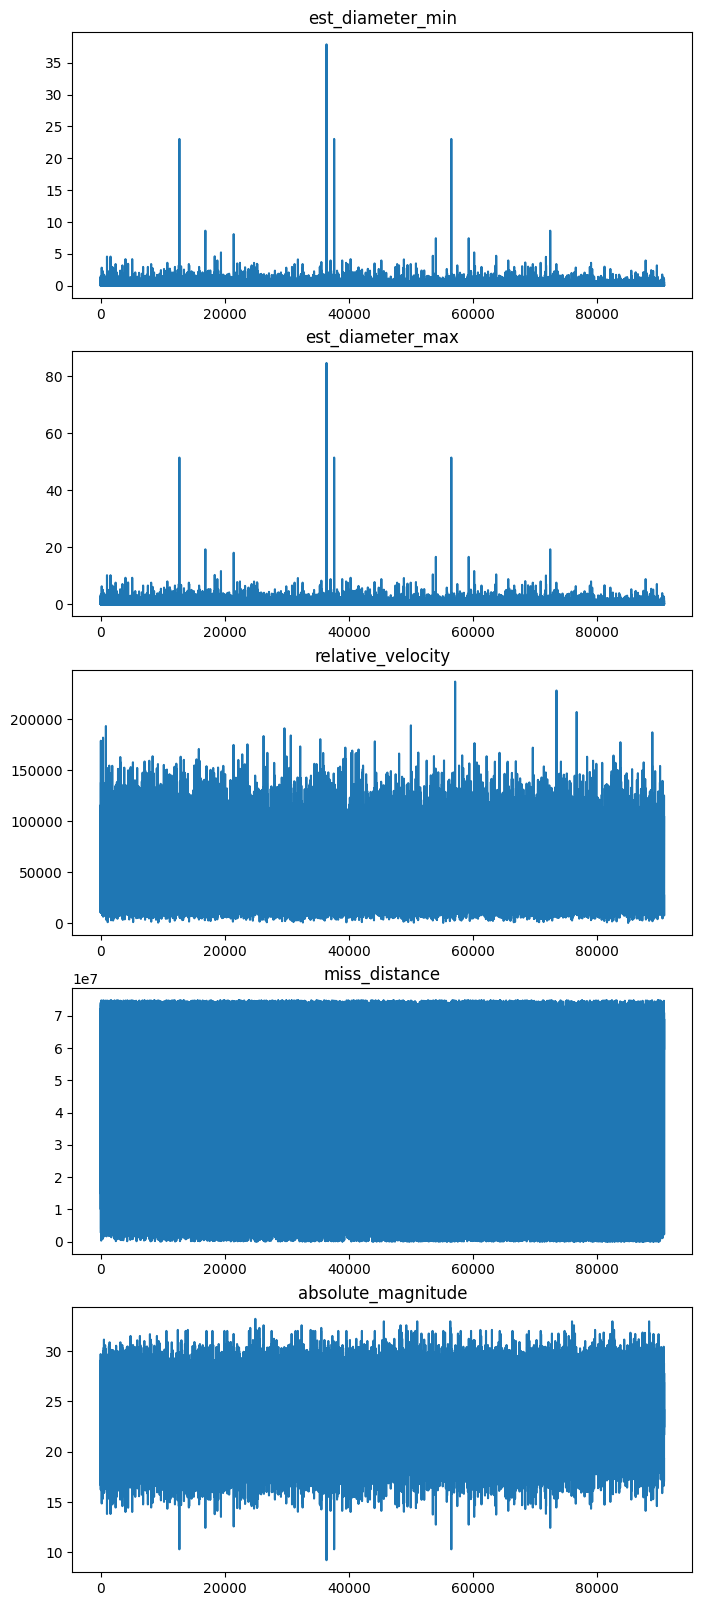

In [134]:
# visualizing the features
fig, ax = plt.subplots(5, 1, figsize = (8, 20))
columns = list(dataset.columns)

for i in range(len(columns)-1):
    ax[i].plot(dataset[columns[i]])
    ax[i].set_title(columns[i])

On visualizing the features, we can observe that the range of features is not standardized. Due to this, one feature can prove to be heavier or more decisive than other feature. This could affect the overall performance of the model. Hence, to avoid this we will standardize the features so that they will be in the same range

In [135]:
# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [136]:
# function to visualize evaluation metrics
def visualize_metrics(model_name, y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)


    # plotting metrics as a bar graph
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]
    plt.figure()
    plt.bar(metrics, values)
    plt.title(f"{model_name} Evaluation Metrics")
    plt.show()


# Logistic Regression

In [137]:
# logistic regression
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

y_pred_lr = logisticRegression.predict(X_test)

Accuracy:  0.9017503302509907
Precision:  0.518796992481203
Recall:  0.07688022284122563
F1 Score:  0.1339155749636099


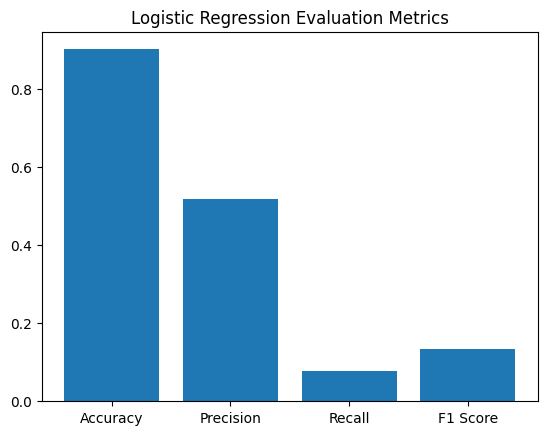


Logistic Regression Confusion Matrix:
 [[16245   128]
 [ 1657   138]]


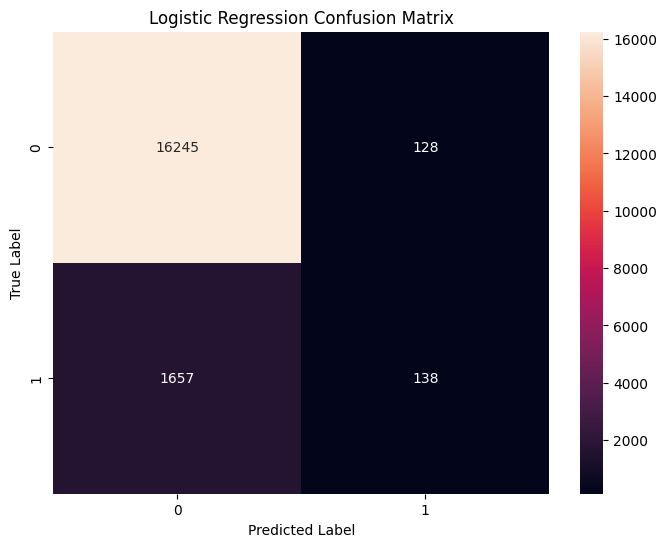

In [138]:
# logistic regression metrics
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", lr_precision)
print("Recall: ", lr_recall)
print("F1 Score: ", lr_f1)

# visualizing logistic regression metrics
visualize_metrics('Logistic Regression', y_pred_lr, y_test)

# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:\n", cm_lr)

# Create a heatmap for Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Support Vector Classification

In [139]:
# support vector classification
svc = LinearSVC(loss = 'squared_hinge', dual = True)
svc.fit(X_train, y_train)

y_pred_svc = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.9015852047556143
Precision:  0.8181818181818182
Recall:  0.005013927576601671
F1 Score:  0.009966777408637873


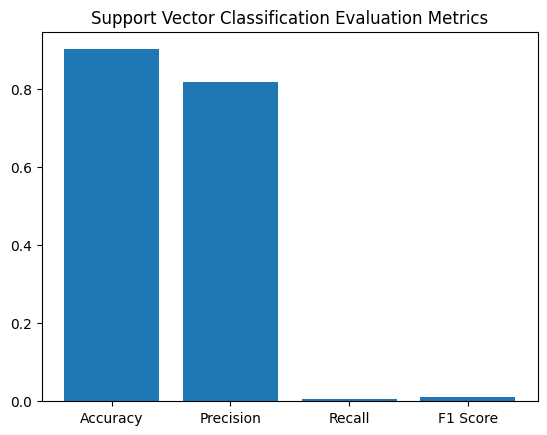


Support Vector Classification Confusion Matrix:
 [[16371     2]
 [ 1786     9]]


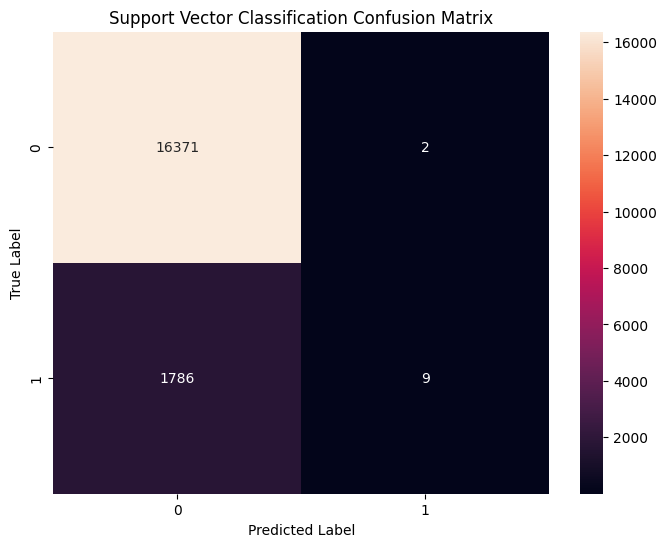

In [140]:
# support vector classification metrics
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)

print("Accuracy: ", accuracy_score(y_test, y_pred_svc))
print("Precision: ", svc_precision)
print("Recall: ", svc_recall)
print("F1 Score: ", svc_f1)

# visualizing svc metrics
visualize_metrics('Support Vector Classification', y_pred_svc, y_test)

# Confusion Matrix for Support Vector Classification
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("\nSupport Vector Classification Confusion Matrix:\n", cm_svc)

# Create a heatmap for Support Vector Classification Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt="d")
plt.title("Support Vector Classification Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# PCA

In [141]:
# pca model
pca = PCA(n_components = 2)

In [142]:
# fitting features to pca model
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### Logistic Regression (PCA)

In [143]:
# training logistic regression using pca
logisticRegression.fit(X_train_pca, y_train)
y_pred_lr_pca = logisticRegression.predict(X_test_pca)

Accuracy:  0.8957507705856451
Precision:  0.25125628140703515
Recall:  0.027855153203342618
F1 Score:  0.05015045135406218


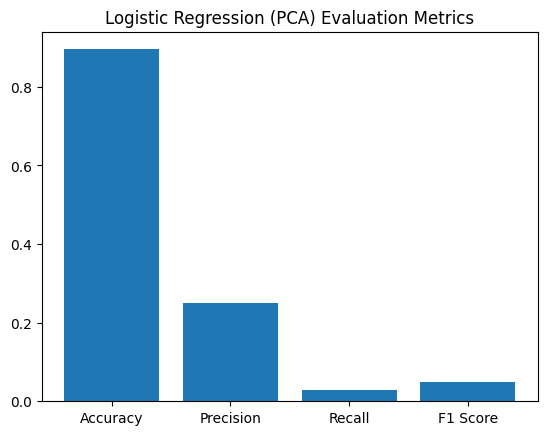


Logistic Regression (PCA) Confusion Matrix:
 [[16224   149]
 [ 1745    50]]


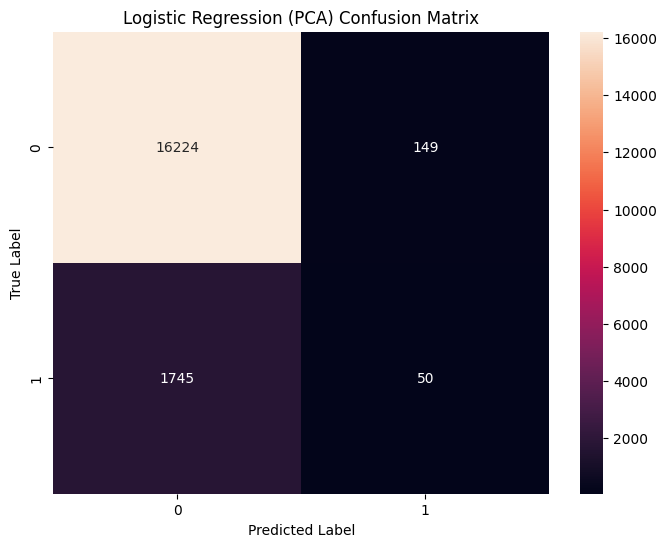

In [144]:
# logistic regression metrics (pca)
lr_precision_pca = precision_score(y_test, y_pred_lr_pca)
lr_recall_pca = recall_score(y_test, y_pred_lr_pca)
lr_f1_pca = f1_score(y_test, y_pred_lr_pca)


print("Accuracy: ", accuracy_score(y_test, y_pred_lr_pca))
print("Precision: ", lr_precision_pca)
print("Recall: ", lr_recall_pca)
print("F1 Score: ", lr_f1_pca)

# visualizing lr pca metrics
visualize_metrics('Logistic Regression (PCA)', y_pred_lr_pca, y_test)

# Confusion Matrix for Logistic Regression (PCA)
cm_lr_pca = confusion_matrix(y_test, y_pred_lr_pca)
print("\nLogistic Regression (PCA) Confusion Matrix:\n", cm_lr_pca)

# Create a heatmap for Logistic Regression (PCA) Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_pca, annot=True, fmt="d")
plt.title("Logistic Regression (PCA) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Support Vector Classification (PCA)

In [145]:
# training svc using pca
svc.fit(X_train_pca, y_train)
y_pred_svc_pca = svc.predict(X_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.8977873183619551
Precision:  0.25
Recall:  0.017270194986072424
F1 Score:  0.03230849400729547


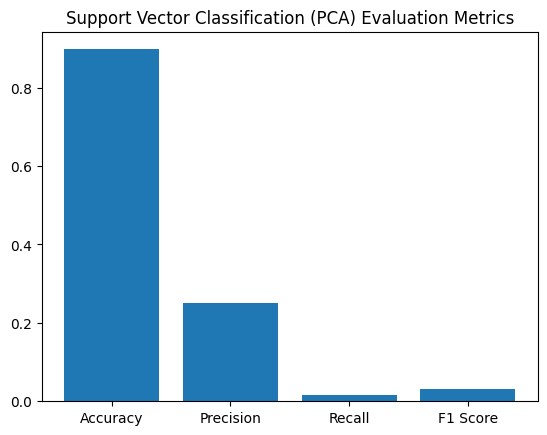


Support Vector Classification (PCA) Confusion Matrix:
 [[16280    93]
 [ 1764    31]]


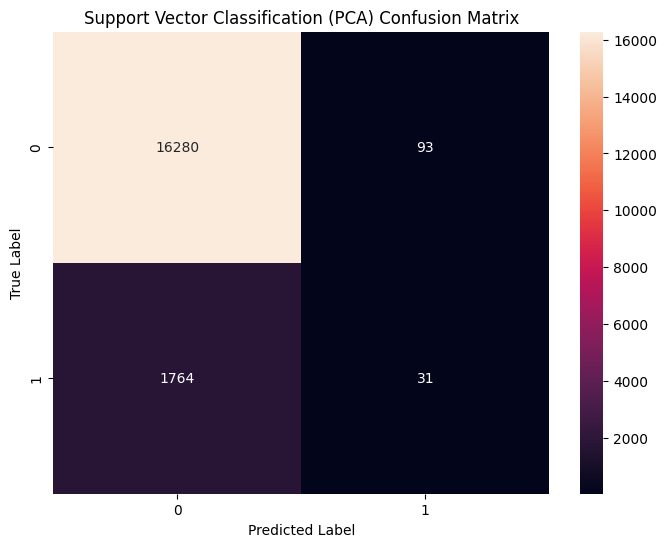

In [146]:
# svc metrics (pca)
svc_precision_pca = precision_score(y_test, y_pred_svc_pca)
svc_recall_pca = recall_score(y_test, y_pred_svc_pca)
svc_f1_pca = f1_score(y_test, y_pred_svc_pca)

print("Accuracy: ", accuracy_score(y_test, y_pred_svc_pca))
print("Precision: ", svc_precision_pca)
print("Recall: ", svc_recall_pca)
print("F1 Score: ", svc_f1_pca)

# visualizing svc pca metrics
visualize_metrics('Support Vector Classification (PCA)', y_pred_svc_pca, y_test)

# Confusion Matrix for Support Vector Classification (PCA)
cm_svc_pca = confusion_matrix(y_test, y_pred_svc_pca)
print("\nSupport Vector Classification (PCA) Confusion Matrix:\n", cm_svc_pca)

# Create a heatmap for Support Vector Classification (PCA) Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc_pca, annot=True, fmt="d")
plt.title("Support Vector Classification (PCA) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
